In [0]:
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import torch


In [87]:
y, sr = librosa.load("0b09edd3_nohash_0.wav", sr=None)
ipd.Audio(y, rate=sr)

In [88]:
y.shape

(14336,)

In [90]:
#  Clean the data to remove negibile values; mostly from the begining and the end
def cleanData(y):
  y_new = []
  for i in range(len(y)):
    if  -0.0009  > y[i]  or 0.0009 < y[i]: 
      y_new.append(y[i])
      
  return np.array(y_new)

y_cleaned = cleanData(y)
print("Shape of cleaned audio ",y_cleaned.shape)
print("Shape of original audio ",y.shape)



Shape of cleaned audio  (8447,)
Shape of original audio  (14336,)


# STFT

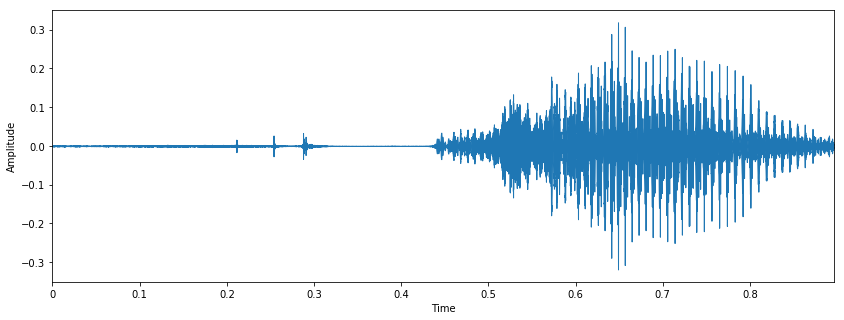

In [91]:
# Original audio 
plt.figure(figsize=(14, 5))
plt.ylabel("Amplitude")
librosa.display.waveplot(y, sr=sr)
plt.show()

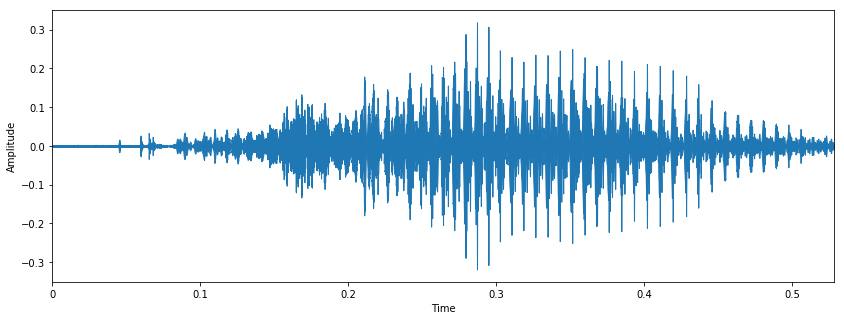

In [92]:
# Cleaned audio
plt.figure(figsize=(14, 5))
plt.ylabel("Amplitude")
librosa.display.waveplot(y_cleaned, sr=sr)
plt.show()

In [0]:
window_size=0.02
window_stride=0.01
window="hamming"
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

In [94]:
# Original audio
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
D.shape

(161, 90)

In [95]:
# Cleaned audio
D_cleaned = librosa.stft(y_cleaned, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
D_cleaned.shape


(161, 53)

In [0]:
# Original audio
spect, phase = librosa.magphase(D)

# Cleaned audio
spect_cleaned, phase_cleaned = librosa.magphase(D_cleaned)

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


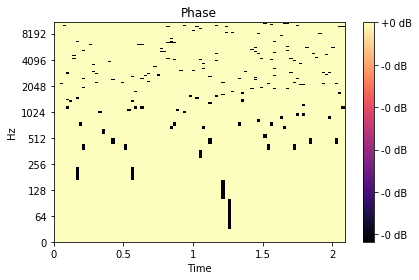

In [97]:
# Original audio
ld.specshow(librosa.amplitude_to_db(phase,ref=np.max),y_axis='log', x_axis='time')
plt.title('Phase') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


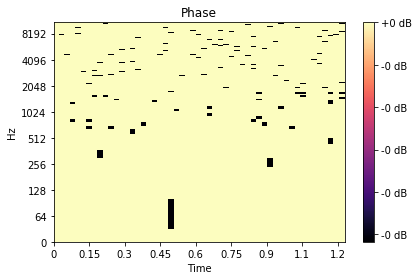

In [98]:
# Cleaned audio
ld.specshow(librosa.amplitude_to_db(phase_cleaned,ref=np.max),y_axis='log', x_axis='time')
plt.title('Phase') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

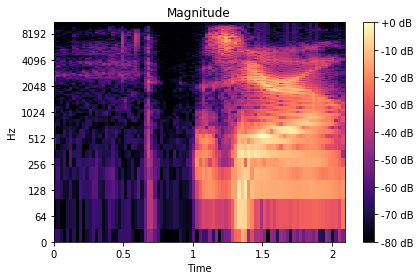

In [99]:
# Original audio
ld.specshow(librosa.amplitude_to_db(spect,ref=np.max),y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

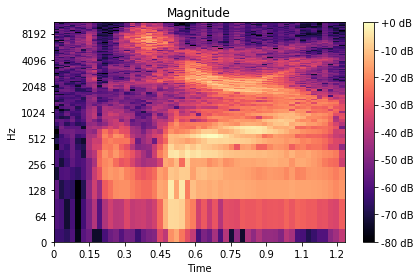

In [100]:
# Cleaned audio
ld.specshow(librosa.amplitude_to_db(spect_cleaned,ref=np.max),y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [101]:
print("Shape of original spectogram ", spect.shape)
print("Shape of cleaned spectogram ", spect_cleaned.shape)

Shape of original spectogram  (161, 90)
Shape of cleaned spectogram  (161, 53)


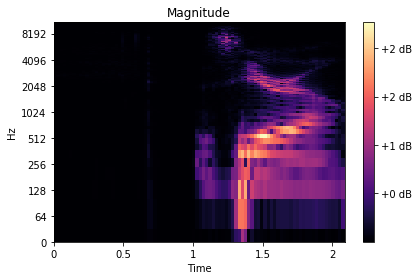

In [102]:
# Original spectogram
spect = np.log1p(spect)
ld.specshow(spect,y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

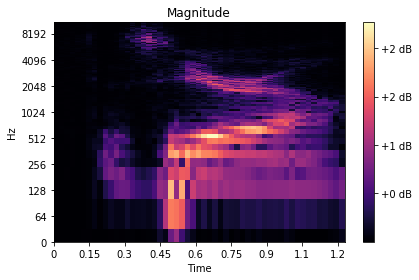

In [103]:
# Cleaned spectogram
spect_cleaned = np.log1p(spect_cleaned)
ld.specshow(spect_cleaned,y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# MEL Spectrogram


Using y_axis=mel plots the y-axis on the mel scale which is similar to the  log(1+f)  function:

m=2595*log10(1+f/700)

In [104]:
# Original audio
S=librosa.feature.melspectrogram(y, sr=sr,n_fft=n_fft,hop_length=hop_length,)
logS = librosa.power_to_db(abs(S))

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [106]:
# Cleaned audio
S_cleaned=librosa.feature.melspectrogram(y_cleaned, sr=sr,n_fft=n_fft,hop_length=hop_length,)
logS_cleaned = librosa.power_to_db(abs(S))

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [107]:
logS.shape

(128, 53)

In [109]:
logS_cleaned.shape

(128, 53)

In [110]:
logS.max()

3.923983219919287

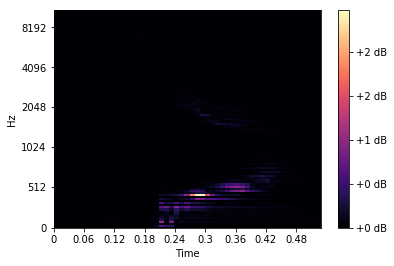

In [111]:
# Display without converting to log scale
librosa.display.specshow(S_cleaned, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

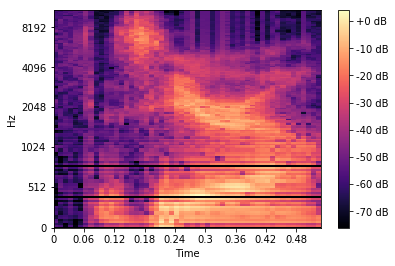

In [112]:

librosa.display.specshow(logS_cleaned, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

# MFCC


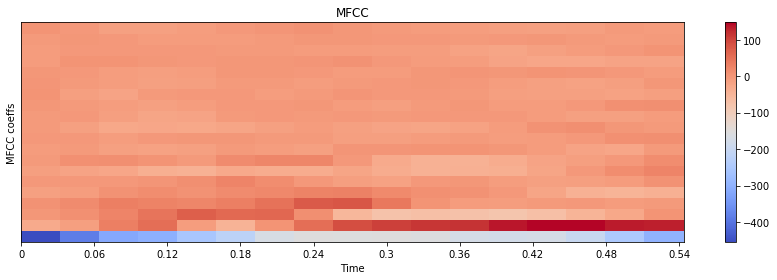

In [82]:
mfcc = librosa.feature.mfcc(y_cleaned, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

In [0]:
log = librosa.power_to_db(abs(mfcc))

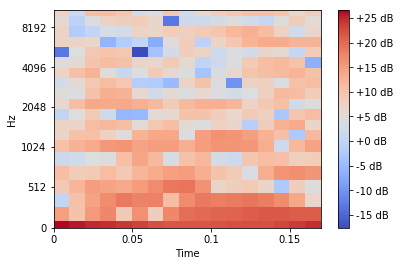

In [84]:
librosa.display.specshow(log, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [85]:
mfcc.shape

(20, 17)